<a href="https://colab.research.google.com/github/liupengzhouyi/LearningPytorch/blob/master/2020_3_10/IinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression 

## import backage

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## setting super parameters

In [0]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

## setting data set

In [0]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## create model

In [0]:
model = nn.Linear(input_size, output_size)

## loss function

In [0]:
criterion = nn.MSELoss()

## create optimizer

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

## Train the model

In [23]:
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    # 反向传播求梯度
    loss.backward()
    # 更新所有参数
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 46.7366
Epoch [10/60], Loss: 19.2120
Epoch [15/60], Loss: 8.0609
Epoch [20/60], Loss: 3.5429
Epoch [25/60], Loss: 1.7122
Epoch [30/60], Loss: 0.9701
Epoch [35/60], Loss: 0.6690
Epoch [40/60], Loss: 0.5465
Epoch [45/60], Loss: 0.4965
Epoch [50/60], Loss: 0.4758
Epoch [55/60], Loss: 0.4669
Epoch [60/60], Loss: 0.4629


## Plot the graph

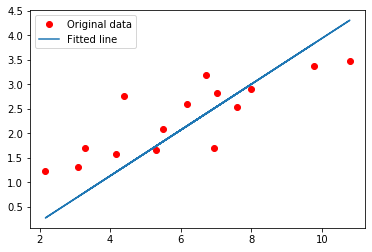

In [24]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Save the model checkpoint

In [0]:
torch.save(model.state_dict(), 'model.ckpt')

over!